# Problem Statement:


We are given with a dataset of car price prediction.our objective is to find insights from this dataset and buuild a model which can predict car price accurately.

Which variables are significant in predicting the price of a car.

How well those variables describe the price of a car.

Dataset link: "/kaggle/input/used-cars-price-prediction/train-data.csv"

## Let's start with importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import pickle
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading a dataset
df = pd.read_csv("car data.csv")

In [3]:
# Checking a shape of the dataset
df.shape

(301, 9)

In [4]:
# Looking for first five rows of the dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# Printing unique values for a categorical value
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [6]:
# Checking for null values in our dataset
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# Overall distribution of our dataset
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
# Dropping Car_Name coulmn beacuse it is not useful for our analysis.
df_final = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [10]:
# Checking a dataset after transformation
df_final.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
# We want to predict current price of the car therefore we are adding new column i.e Current_year
df_final['Current_Year'] =2021

In [12]:
# Checking a dataset after transformation
df_final

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2021
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2021
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2021
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2021


In [13]:
# We are creating new feature because it is crucial for our analysis.
df_final['Num._of_year'] = df_final['Current_Year']-df['Year']

In [14]:
# Checking a dataset after transformation
df_final.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Num._of_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [15]:
# Now dropping columns which are not important
df_final.drop(['Year','Current_Year'], axis=1, inplace=True)

In [16]:
# Checking a dataset after transformation 
df_final

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Num._of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,5
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,6
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,12
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,4


In [17]:
# Converting categorical feature into numerical by using get_dummies function.
df_final = pd.get_dummies(df_final, drop_first=True)

In [18]:
# Checking a dataset after transformation
df_final

,Selling_Price,Present_Price,Kms_Driven,Owner,Num._of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,0,1
297,4.00,5.90,60000,0,6,0,1,0,1
298,3.35,11.00,87934,0,12,0,1,0,1
299,11.50,12.50,9000,0,4,1,0,0,1


In [19]:
# Checking for cor-relation
df_final.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Num._of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Num._of_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


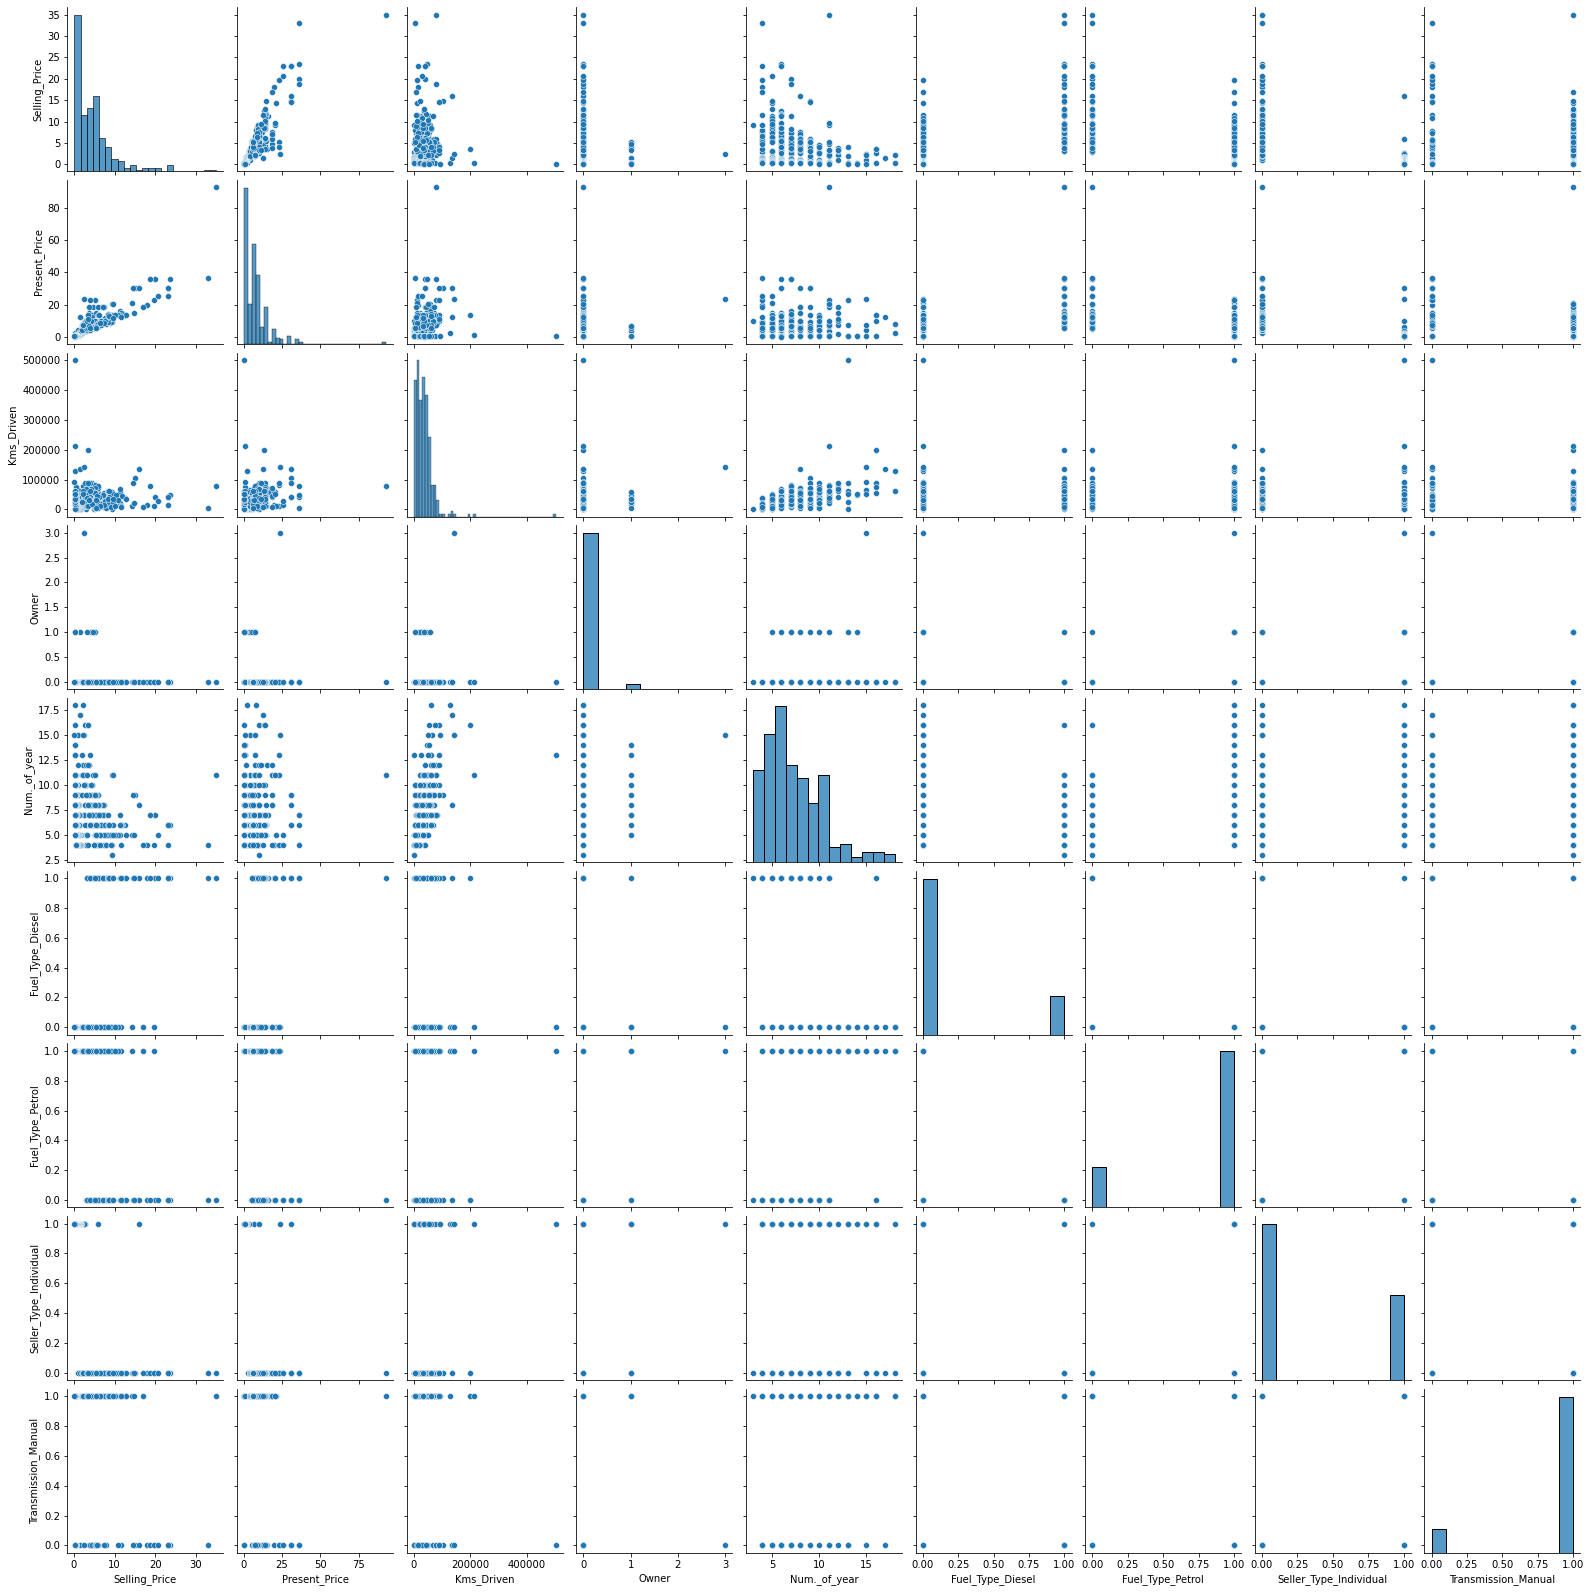

In [20]:
# Drawing a pairplot
sns.pairplot(df_final)

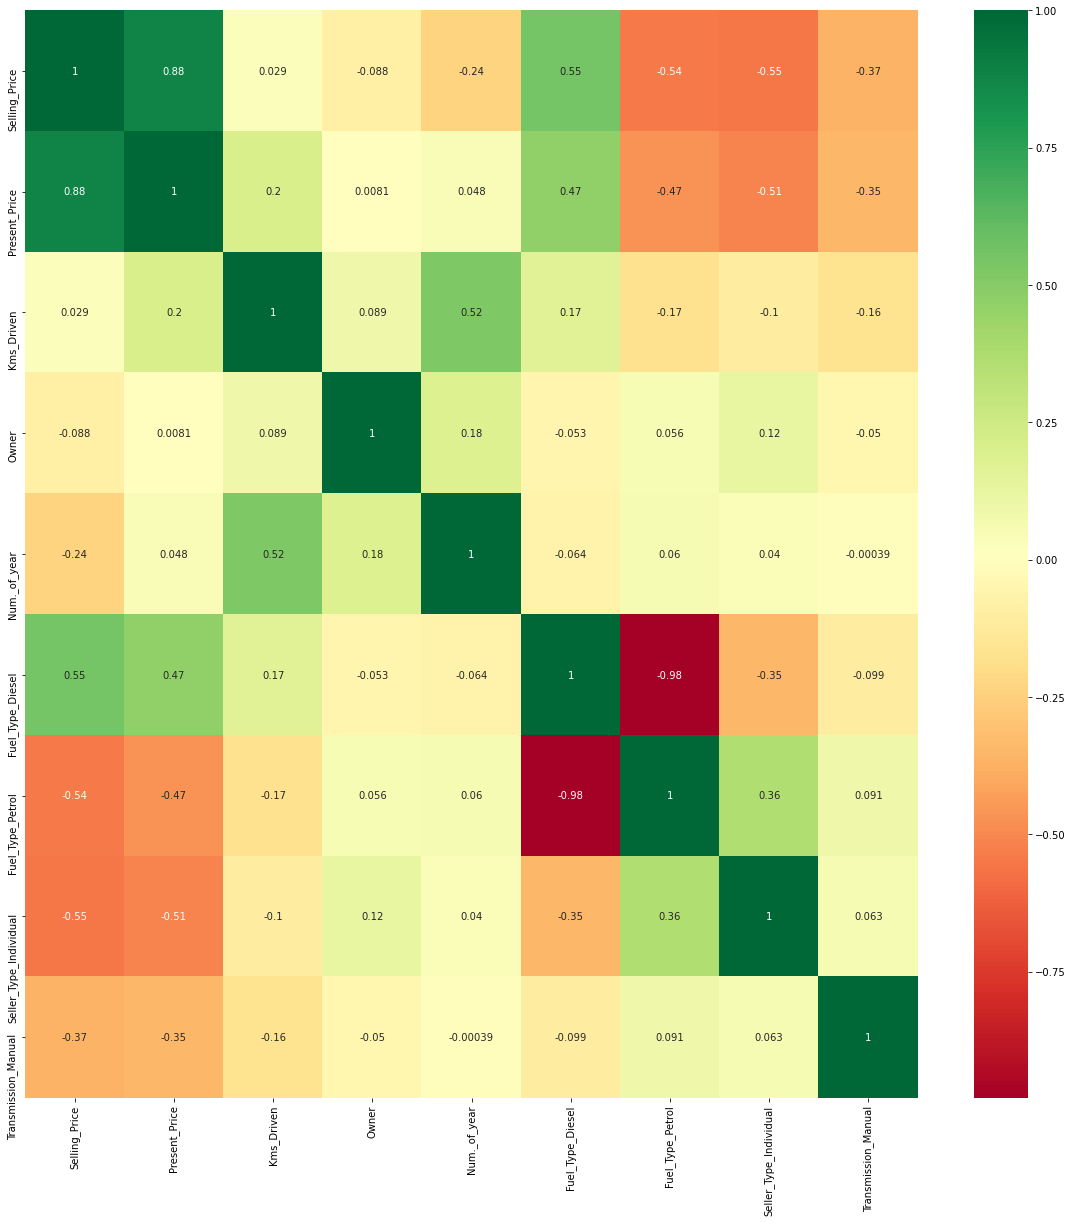

In [21]:
# Drawing a heatmap to better understand cor-relation between denpend and independent variable. 
corrmat = df_final.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heatmap
a = sns.heatmap(df_final[top_corr_features].corr(), annot=True,cmap="RdYlGn")

In [22]:
# Checking a dataset after transformation
df_final

,Selling_Price,Present_Price,Kms_Driven,Owner,Num._of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,0,1
297,4.00,5.90,60000,0,6,0,1,0,1
298,3.35,11.00,87934,0,12,0,1,0,1
299,11.50,12.50,9000,0,4,1,0,0,1


In [23]:
# Now assign independent and dependent features
X = df_final.iloc[:,1:]
y = df_final.iloc[:,0]

In [24]:
X.head()

,Present_Price,Kms_Driven,Owner,Num._of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [25]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [26]:
## Feature importance- looking for feature which are most important 
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [27]:
print(model.feature_importances_)

[0.39060755 0.04065458 0.00098148 0.07654966 0.21247166 0.01619745
 0.1242201  0.13831753]


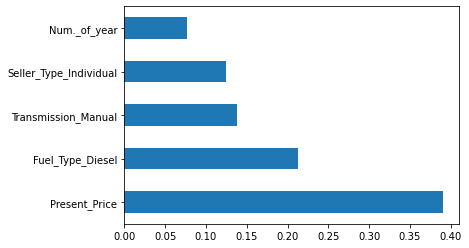

In [28]:
# plot the graph of feature importance for better visualization
feature_importance = pd.Series(model.feature_importances_,index=X.columns)
feature_importance.nlargest(5).plot(kind= 'barh')
plt.show()

In [29]:
# Splitting our dataset into train and test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size =.25)

In [30]:
X_train.shape

(225, 8)

In [31]:
# Apply random forest regressor.
from sklearn.ensemble import RandomForestRegressor
reg_random = RandomForestRegressor()

In [32]:
## Hyperparameters
n_estimators= [int(x) for x in np.linspace(start= 100, stop = 1200)]

In [33]:
# Randomized search CV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [34]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [35]:
rf = RandomForestRegressor()

In [36]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [37]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   49.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [38]:
prediction = rf_random.predict(X_test)

In [39]:
prediction

array([ 3.85116016,  0.51526977,  7.77935453,  5.21446201,  0.44518236,
        7.80023124,  0.44518236, 20.15226649, 16.77896535,  1.14807647,
        0.51526977, 20.22480869,  8.36446768,  5.05488179,  5.36148564,
        0.43312956,  0.23376848,  2.83187729,  2.9726009 , 10.39907262,
        3.33415243,  4.16483818,  4.85313826,  5.02583645,  0.47264589,
        5.04122773,  3.11501298,  3.78656661,  5.65585065, 19.992912  ,
        5.38304477, 10.00153789,  4.97368295,  5.38618768,  4.52679541,
        0.56627792,  7.36304748,  6.5540294 ,  0.44264861, 10.07828665,
        0.63593887,  2.95242919,  0.35567085,  0.61330605,  4.75876198,
        4.13827593,  5.56677869, 20.22480869,  3.08520708,  4.87829349,
        1.32766397,  0.51174207,  9.8905059 ,  6.0154834 ,  0.849332  ,
        6.10865217,  0.59911525,  5.46637082,  3.05380914,  0.38757127,
        0.41724188,  4.19664711,  0.66811213,  8.41744354,  0.27529807,
        2.52048023, 10.2094706 ,  2.69641077,  4.40955815,  0.39

In [40]:
y_pred = rf_random.predict(X_train)

In [41]:
print("MSE on training:", mean_squared_error(y_pred, y_train))

y_pred_valid = rf_random.predict(X_test)

print("MSE on validation:", mean_squared_error(y_pred_valid, y_test))

MSE on training: 2.098994138880398
MSE on validation: 2.102418234935121


We see that Random Forest got excellent results on the train data but less good results on test data, this means that our model is in overfit. So we will test another model: XGBoost

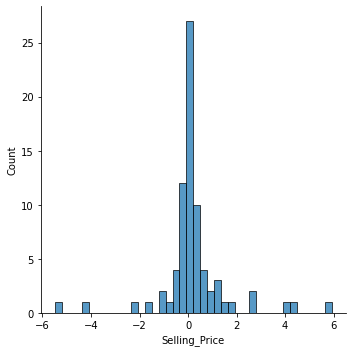

In [42]:
sns.displot(y_test-prediction)

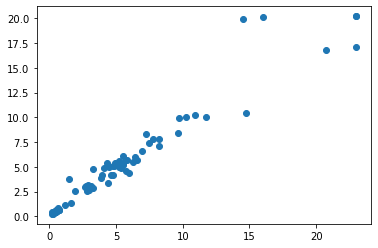

In [43]:
plt.scatter(y_test, prediction)

In [44]:
# Apply xgboost model 
xgbb = xgb.XGBRegressor()

param_grid = {
    "booster": ['gbtree'],
    "eta": [0.01],
    "gamma": [0],
    "max_depth": [5],
    "lambda": [0],
    "alpha": [0]
}

xgb_model = GridSearchCV(estimator=xgbb, cv=5, param_grid=param_grid, verbose=2)
xgb_model.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5, total=   1.9s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5, total=   0.3s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5, total=   0.3s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.9s finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [45]:
y_pred_train = xgb_model.predict(X_train)

print("MSE on training:", mean_squared_error(y_pred_train, y_train))

y_pred_valid = xgb_model.predict(X_test)

print("MSE on validation:", mean_squared_error(y_pred_valid, y_test))

MSE on training: 5.733885547980484
MSE on validation: 12.534247589592972


In the XGBoost model we got a more durable model with a low overfit, but compared to the Random Forest where we still got a lower MSE.

In [46]:
import pickle
# open a file, where you want  to store the data
file = open('regression_rf.pkl','wb')

# dup information to that file
pickle.dump(rf_random,file)